# DataSet Analysis 

#### Importing the dataset

In [1]:
import pandas as pd 
import random 

In [2]:
#considering only first 2 Lakhs entry 
"""
n = 7000000 #number of records in file
s = 200000 #desired sample size
skip = sorted(random.sample(range(n),n-s))
"""
data = pd.read_csv("/home/tanya/Major_Project/Datasets/Crimes_-_2001_to_present.csv",nrows = 200000)

#### _checking the available data_

In [3]:
data.shape

(200000, 22)

#### _column values of the data available_

In [4]:
data.columns.values 

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'], dtype=object)

In [5]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [6]:
print("No of columns in data dataset: "+str(len(data.columns.values)))

No of columns in data dataset: 22


## Visualising the dataset 

### importing the required libraries 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### _getting the columns as a list _

In [8]:
columns = data.columns.get_values().tolist()
print(columns)

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


## Primary Type 
### _The primary description of the criminal offense._

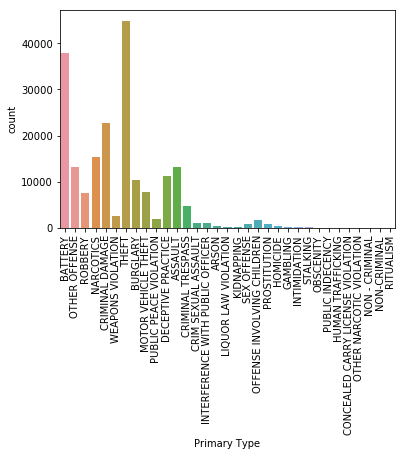

In [9]:
plot = sns.countplot(x=columns[5], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

## Arrest 
### _Indicates whether an arrest was made or not._

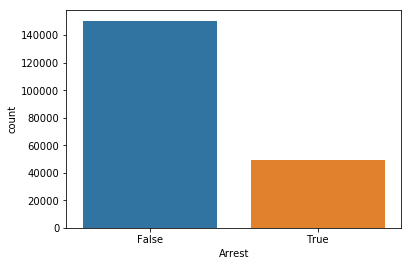

In [10]:
plot = sns.countplot(x=columns[8], data=data)

## District 
### _Indicates the police district where the incident occurred._

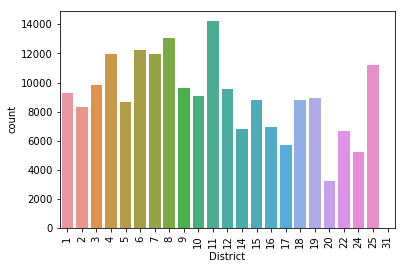

In [11]:
plot = sns.countplot(x=columns[11], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

## Domestic 
### _Indicates whether the incident was domestic-related as defined by the Domestic Violence Act._

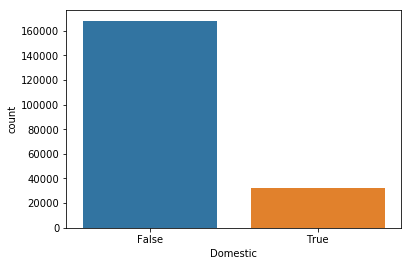

In [12]:
plot = sns.countplot(x=columns[9], data=data)

## Location Description 
### _Description of the location where the incident occured._

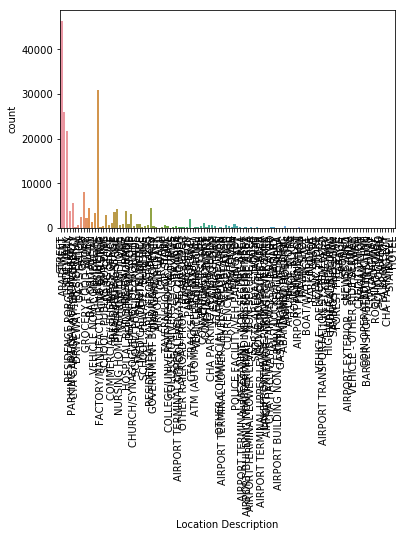

In [13]:
plot = sns.countplot(x=columns[7], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

### _splitting date into three columns  of month , day & year_

In [14]:
# initialising an empty list 
month = []
day = []
year = []

In [15]:
# iterating over the date column to split up the date and store in the list
for i in range(0 , len(data)):
    month.append(int(data['Date'][i].split(" ")[0].split("/")[0]))
    day.append(int(data['Date'][i].split(" ")[0].split("/")[1]))
    year.append(int(data['Date'][i].split(" ")[0].split("/")[2]))

#### _merging the obtained list of day , month & year into the dataset_

In [16]:
data = pd.concat([data,pd.DataFrame({'Month':month ,'Day':day , 'CrimeYear' : year})]  , axis=1)

In [17]:
data.shape 

(200000, 25)

In [18]:
data.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'CrimeYear', 'Day', 'Month'], dtype=object)

In [19]:
columns = data.columns.get_values().tolist()
columns 

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'CrimeYear',
 'Day',
 'Month']

## Year 
### _Year wise crime occurings recorded._

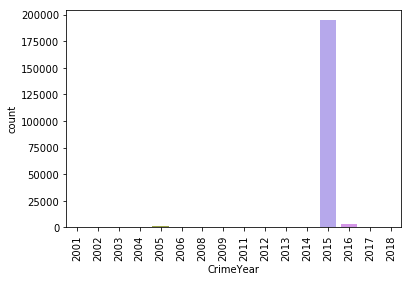

In [20]:
plot = sns.countplot(x=columns[22], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

## Month 
### _Month wise crime occurings recorded._

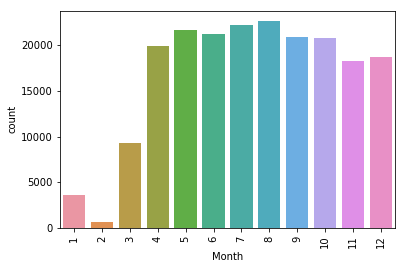

In [21]:
plot = sns.countplot(x=columns[24], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

## Day 
### _Day wise crime occurings recorded._

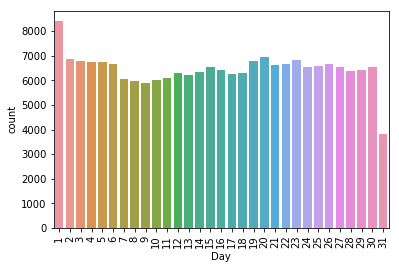

In [22]:
plot = sns.countplot(x=columns[23], data=data)
locs, labels = plt.xticks()
plot.set_xticklabels(labels ,rotation=90)

# Preprocessing of the dataset

### _removing unnessecary columns from the data set _

In [23]:
data.drop(['ID' ,'Case Number' ,'IUCR' ,'FBI Code' ,'X Coordinate', 
           'Y Coordinate' ,'Updated On' ,'Location', 'Beat' , 'Community Area' 
           ,'District' ,'Ward','Block' ] ,axis=1 ,inplace =True)

#### _removing the unnecesssary date entries_

In [24]:
data.drop(['Date','CrimeYear'] ,axis = 1 ,inplace =True)

In [25]:
data.columns.values

array(['Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Year', 'Latitude', 'Longitude', 'Day', 'Month'], dtype=object)

In [26]:
data.shape

(200000, 10)

In [27]:
data.head(5)

,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Day,Month
0,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,2015,41.891399,-87.744385,18,3
1,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,2015,41.773372,-87.665319,18,3
2,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2015,41.813861,-87.596643,18,3
3,BATTERY,SIMPLE,APARTMENT,False,False,2015,41.800802,-87.622619,18,3
4,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,2015,41.878065,-87.743354,18,3


In [28]:
print("No of columns in data dataset: "+str(len(data.columns.values)))

No of columns in data dataset: 10


#### handling the null entries of the data set

In [29]:
data.isnull().sum()

Primary Type               0
Description                0
Location Description     117
Arrest                     0
Domestic                   0
Year                       0
Latitude                1391
Longitude               1391
Day                        0
Month                      0
dtype: int64

##### drop null values

In [30]:
data = data.dropna(axis=0 ,subset=['Latitude' , 'Longitude'])

##### drop remaining null values

In [31]:
data = data.dropna(axis=0 , subset= ['Location Description'])

In [32]:
data.isnull().sum()

Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Year                    0
Latitude                0
Longitude               0
Day                     0
Month                   0
dtype: int64

##### _shuffling data and reseting the index_

In [33]:
from sklearn.utils import shuffle
data = shuffle(data)
data=data.reset_index(drop=True)

##### _extracting out the crime occured before 2017_

In [34]:
data2016 =data[data['Year']==2016]

In [35]:
data=data[data['Year']<2017]

In [36]:
data.shape

(198477, 10)

In [37]:
data2016.shape

(3030, 10)

In [38]:
#reseting the index 
data=data.reset_index(drop=True)
data2016 = data2016.reset_index(drop=True)

In [39]:
data.columns.values

array(['Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Year', 'Latitude', 'Longitude', 'Day', 'Month'], dtype=object)

### _splitting the dataset into dependent and independent variable for Primary Type_

In [40]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [41]:
X.shape

(198477, 9)

In [42]:
y.shape

(198477,)

#### _handling categorical data from the dataset _

In [43]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [44]:
lableencoder_X0 = LabelEncoder()
X[: , 0]= lableencoder_X0.fit_transform(X[: ,0])

In [45]:
lableencoder_X1 = LabelEncoder()
X[: , 1]= lableencoder_X1.fit_transform(X[: ,1])

In [46]:
lableencoder_X2 = LabelEncoder()
X[: , 2]= lableencoder_X2.fit_transform(X[: ,2])

In [47]:
lableencoder_X3 = LabelEncoder()
X[: , 3]= lableencoder_X3.fit_transform(X[: ,3])

In [48]:
X[0]

array([193, 17, 0, 0, 2015, 41.886370204, -87.62069119899999, 23, 4], dtype=object)

In [49]:
onehotencoder = OneHotEncoder(categorical_features=[0,1 ,4,7,8])
X= onehotencoder.fit_transform(X).toarray() 

In [50]:
X.shape

(198477, 475)

In [51]:
lableencoder_y = LabelEncoder()
y=lableencoder_y.fit_transform(y) 

####  _Splitting the dataset into the Training set and Test set_

In [52]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/home/tanya/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### _feature scaling _

In [53]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
X_train.shape

(158781, 475)

### fitting traning set to logistic Regression Classification Model

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred = classifier.predict(X_test)
y_pred.size

39696

In [58]:
for i in range(0,20):
    print(str(y_pred[i])+" "+str(y_test[i]))

26 26
8 8
23 23
2 2
2 2
2 2
17 17
6 6
23 23
30 30
30 30
6 6
6 6
30 30
18 18
30 30
2 2
23 23
16 16
2 1


#### evaluating the result via confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

In [60]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95
